### Introduction

We will start with Generig Graph search. Graph Search is an algorithm where, given a graph, G(V, E), with a starting vertex s $\in$ V, we identify all vertices of G reachable from s


The generic graph search algorithm does the following, with the input grapg G = (V, E) and start vertex s

```
mark s as explored and all other vertices as unexplored

while there is an edge (v, w) in E where v is explored and w is not explored:
    mark w as explored

```

---

The above algorithm is very abstract and the strategy to pick the edge is not specified. In the above algorithm, the vertex v is in the frontier and we wish to find all edges with one vertex in frontier and other outside. Two strategies that we can look at are 

- For all vertices in the frontier, explore all edges that go from them to vertices outside the frontier
- Another strategy would be 
    - Pick one vertex in the frontier
    - Pick one edge from the this vertex to another vertex not in frontier
    - Add this another vertex to the frontier and aggressively keep adding the vertices in the frontier before looking at another vertex, unlike the first strategy
    
These two approches are BFS(Breadth First Search) and DFS (Depth First Search) algorothms for graph exploration. While they both work for finding all possible vertices reachable from a starting vertex s in time $\theta(m + n)$, for some use cases we choose one over another.

For example, for computing the shortst distance to a vertex from a starting vertex s can be done only using BFS efficiently. Where as some use cases like finding strongly connected components in case of directed graphs, we need DFS.



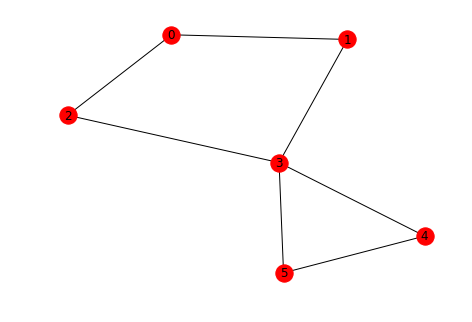

In [26]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#A = np.matrix([[0, 1, 1, 0, 0, 0], 
#               [1, 0, 0, 1, 0, 0],
#               [1, 0, 0, 1, 0, 0],
#               [0, 1, 1, 0, 1, 1],               
#               [0, 0, 0, 1, 0, 1],
#               [0, 0, 0, 1, 1, 0],               
#              ])
#G = nx.from_numpy_matrix(A)

G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
plt.show()


Consider the above graph, starting from vertex 0 which is at level 0, vertices 1 and 2 are at level 1, vertex 3 at level 2 and vertices 4 and 5 at level 3.

BFS will discover these edges in this very order. 

Following Python code makes use of queues and implements BFS and also give is the level of each of the vertex from a provided starting vertex. We saw how addacency lists can be defined in Python in previous notebook, to avoid copying over the code, we will make use of the graph defined in above cell from python package ``networkx`` to get adjacent edges of a given vertex. 

In [32]:
adjacency_dict = {v: edges for v, edges in zip(G.nodes(), G.adjacency_list())}
adjacency_dict

{0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [2, 1, 4, 5], 4: [3, 5], 5: [3, 4]}


If we look at the above dictionary, the key of the dictionary is the vertex and the value is  the list of edges connected to it. With this dictionary, let us use bfs to find the level of vertices starting with vertex 0 as the starting vertex and see of we get the levels we expect.


In [66]:
def bfs(adg_dict, start_vertex):
    from queue import Queue
    import math
    
    #1. Create queue, we will add tuple of the vertex and level
    q = Queue()
    
    #2. Initialize all levels to infinite. Any vertex not reachable from start_vertex will stay infinite
    levels = [math.inf] * (len(adg_dict.keys()) + 1)
    
    #3. Set of explored vertices
    explored = set()
    
    #4. Start by putting the start_vertex as level 0
    q.put((start_vertex, 0))
    
    #5. Mark, start vertex as explored
    explored.add(start_vertex)
    
    #6. Iterate till we have no more elements in the queue
    while not q.empty():
        #7. Get the vertex and its level (stored as tuple) from head of the queue
        vertex, level = q.get()
        
        #8. Store the level of the vertex in the list (remember, we will never visit the vertex more than once)
        levels[vertex] = level
        
        #9. Get adjacent vertices of this vertex
        for v in adg_dict[vertex]:
            
            #10. Mark them as explored, we dont want to add them to queue if we come across this vertex again
            if v not in explored:                
                explored.add(v)
                
                #11. The level of this vertex is one more than the one we used to get this vertex
                q.put((v, level + 1))

    #12. Once the queue is empty, all vertices reachable from the start are explored, return the list with 
    #the levels of the vertices
    return levels
    
levels = bfs(adjacency_dict, 0)
for v, l in zip(adjacency_dict.keys(), levels):
    print('Node %d is at level %d'%(v, l))

Node 0 is at level 0
Node 1 is at level 1
Node 2 is at level 1
Node 3 is at level 2
Node 4 is at level 3
Node 5 is at level 3


This is what we expected to get. 

---

*** Quiz 8.1. ***

For a graph with minimum 2 edges, the minimum number of layers is 2, irrespective of the number of edges. The maximum is n, which can be formed by forming a chain of vertices like a linked list. So the answer will be (d), 2 and n levels

---

#### Connected components.

Lets look at an examples below

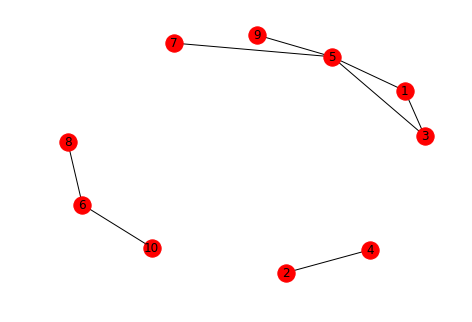

In [54]:
G = nx.Graph()
G.add_edges_from([(1, 3), (1, 5), (3, 5), (5, 9), (5, 7), (2, 4), (6, 8), (6, 10)])
nx.draw(G, with_labels = True)
plt.show()

As we see above, we have three connected components made of vertices {1, 3, 5, 7, 9}, {2, 4} and {6, 8, 10}

These three mentioned above are the connected components of the **undirected graph** above. In general for a set X, if x, y $\in$ X, then we write x ~ y if x is related to y. 

For our graph, the set of the ser of vertices V. We write v ~ w if there is an edge between the vertices v and w.
The equivalence relation has to satisfy the following three properties

- The relations are reflexive, which means x ~ x. In our graph each vertex if related to itself.
- The relation is symmetric, which means if x ~ y then y ~ x. In case of undirected graph, this is true as, if there is an edge between w and v there is also an edge between v and w
- The relation is transitive. Which means if x ~ y and y ~ z then x ~ z. In case of our graph, if we can reach from vertex x to y and we can reach from y to z, then we can reach from x to z.

The equivalence relations partitions the set into some sub sets. Each element in a class is related to each other element in that class and only to elements in that class. 

In case of graph these classes are connected components.

---

*** Quiz 8.2 ***

With n vertices and m edges, in the worst case we have 0 edges and therefore each vertex is forms one connected component. Thus the maximum numbers of Undirected Connected Components (UCC) we can have is n

On other hand, each vertex can reach any other vertex in the graph giving us just one connected component. Thus the answer is (b), 1 and n


---

We will next implement the UCC algorithm using the bfs we already have implemented. The goal of this algorithm is to tell us the number of strongly connected components in a graph (and the vertices in those components.)

In [71]:
def ucc(adj_dict):
    #1. Maintain a set of of unexplored nodes.    
    explored = set()
    ucc_id = 1
    import math
    uccs = {}
    #2. Iterate through all unexplored vertices
    for v in adj_dict.keys():
        
        if v in explored:
            #3a. If vertex is explored, its already part of some connected component, skip it
            continue
        else:
            #3b. Invoke bfs we already implemented. All vertices not reachable will have distance inf
            distances = bfs(adj_dict, v)
            #4. Filter out all vertices with infinite distances, 
            #those are the vertices not in the current connected component
            vertices = [v for v, dist in enumerate(distances) if dist is not math.inf]
            
            #5. Add all vertices in current component to the set, to prevent further exploration of these vertices
            explored.update(vertices)
            
            #6. Store the uccs as 1, 2, 3, 4,....
            uccs[ucc_id] = vertices
            ucc_id += 1
    
    return uccs
    
adj_dict = {k: v for k, v in zip(G.nodes(), G.adjacency_list())}
uccs = ucc(adj_dict)
print('Number of connected components are %d\n'%len(uccs))
for ucc_id in uccs:
    print('Connected component', ucc_id, 'has vertices', uccs[ucc_id])

Number of connected components are 3

Connected component 1 has vertices [1, 3, 5, 7, 9]
Connected component 2 has vertices [2, 4]
Connected component 3 has vertices [6, 8, 10]



The result we see above is exactly what we expected.

---

Lets look at the running time of this algorithm.

For BFS, the algorithm never processes a vertex more than once and thus one component of the complexity if linear in terms of the number of vertices n. If it processes a vertex, it will iterate over each edge of the graph which involves this vertex. Since each vertex if processed only once and each time we process all edges of that vertex, the complexity if also linear in the number of edges in that graph and thus the time complxity is $O(m + n)$

For the connected components (UCC) algorithm, we do a linear scan on all vertices and invoke BFS from a vertex only if it does not yet belong to a UCC, Thus for a connected component *i*, the complexity if $\theta(m_i + n_i)$

The total complexity therefore is $\theta(\sum_i{m_i} + \sum_i{n_i})$

The ucc algoritm discovers all the vertices across all the connected components and by definition of ucc, one vertex belongs to only one connected component. Therefore $\sum{n_i}$ will be same as the total vertices in the graph(s). Similarly, the edges in the connected components belong entirely to the vertices within that connected component and thus $\sum{m_i}$ is same as the number of edges in the graph and therefore the complexity of ucc is $\theta(m + n)$


#### Depth First Search (DFS)

We will now look at another graph traversal algorithm, DFS.

Below, is a recursive implementation of DFS. We will define the same graph used for BFS and do a DFS traversal. First, lets take a look at the graph again



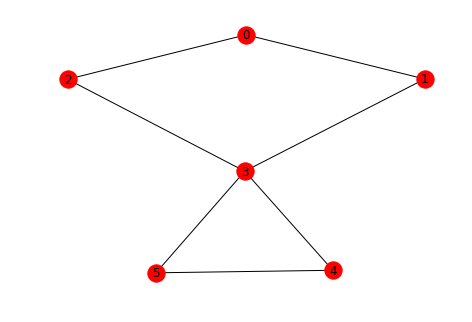

In [72]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
plt.show()

Now, with DFS, we will print out the order in which we iterate through the vertices of the graph

In [77]:
def dfs(adj_dict, start_vertex):
    visited = set()
    order = list()
    def dfs_(current_vertex):
        if current_vertex not in visited:
            visited.add(current_vertex)
            order.append(current_vertex)
            
            for adjacent_vertex in adj_dict[current_vertex]:
                dfs_(adjacent_vertex)
            
        
    dfs_(start_vertex)
    return order
    
    
adj_dict = {k: v for k, v in zip(G.nodes(), G.adjacency_list())}
dfs(adj_dict, 0)

[0, 1, 3, 2, 4, 5]


The above result shows us how the traversal went from 0 -> 1 and then 1 -> 3 and finally 3 traversing all its adjacent vertices including 2 (which is also adjacent to 0). This is now how BFS worked and it would be visited 1 and 2 before it visited 3.

For running time, its similar to BFS, each vertex is visited only once and we travse all edges from the vertex currently processed. Therefore the running time is $\theta(m + n)$


#### Topological Sort

We will now look at an application of DFS, which is topological sort. 

Topological ordering of a graph G = (V, E) is assignment $f(v)$ to every vertex v $\in$ V such that for every edge (v, w) $\in$ E, $f(v) < f(w)$


